In [1]:
import networkx as nx
import matplotlib.patches as mpatches
from matplotlib import cm

from spec import lc_range, w_range
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
import sys
sys.path.append('../')
from visualize_optimization import plot_runs
plt.rcParams['text.usetex'] = True
jax.config.update("jax_enable_x64", True)


run_data/opt.csv best run name: playful-brook-1046 - loss_precise, loss ~= 0.0874755859375


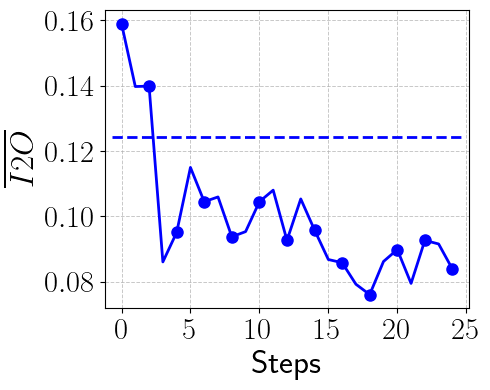

In [2]:
# Normal opt and high-lc init
run_names = ["run_data/opt.csv"]
baseline = [0.12421, None]

plot_runs(run_names, ylabel=r"$\overline{I2O}$", save_path="tln-loss-vs-iter.pdf", method="min", window_size=1, ylog_scale=False, cmp_final_x=5, baseline_values=baseline, markevery=2)

In [3]:
import re

def parse_log(log_str):
    # Use regex to find all float values in the string (including negative values)
    float_values = re.findall(r'-?\d+\.\d+', log_str)
    
    # Convert them from strings to floats
    float_values = [float(value) for value in float_values]
    
    return float_values

log_weights = [
    """ [-0.85820262 -0.79889643 -0.83506702 -0.8358875  -0.81301383 -0.85262404
154  -0.79556404 -0.81862477 -0.8238975  -0.29564649 -0.34922953 -0.36912252
155  -0.29908058 -0.33437175 -0.3274135  -0.3045831  -0.33772802 -0.29564649
156  -0.34922953 -0.36912252 -0.29908058 -0.33437175 -0.3274135  -0.3045831
157  -0.33772802]""",
"""[-0.86538069 -0.7674636  -0.81533188 -0.80039908 -0.84661919 -0.84740359
154  -0.78006215 -0.84965257 -0.82229784 -0.29821634 -0.38509842 -0.36530225
155  -0.36931685 -0.30910178 -0.29707575 -0.37710981 -0.30509908 -0.29821634
156  -0.38509842 -0.36530225 -0.36931685 -0.30910178 -0.29707575 -0.37710981
157  -0.30509908]""",
""" [-0.84779448 -0.77669122 -0.80691566 -0.83385174 -0.81086642 -0.83525981
154  -0.77051291 -0.82556862 -0.81634518 -0.31197335 -0.37509578 -0.37144063
155  -0.35900521 -0.32170289 -0.3290376  -0.30637627 -0.34007331 -0.31197335
156  -0.37509578 -0.37144063 -0.35900521 -0.32170289 -0.3290376  -0.30637627
157  -0.34007331]""",
"""[-0.86470712 -0.77186157 -0.79835835 -0.79962826 -0.80531971 -0.85284635
154  -0.78162626 -0.7941593  -0.80625419 -0.29393961 -0.37797648 -0.38169856
155  -0.34272897 -0.35370958 -0.35725156 -0.34066199 -0.34479308 -0.29393961
156  -0.37797648 -0.38169856 -0.34272897 -0.35370958 -0.35725156 -0.34066199
157  -0.34479308]""",
"""[-0.86730537 -0.81484595 -0.78199204 -0.78516336 -0.82119715 -0.86289875
154  -0.80093677 -0.76615594 -0.81742452 -0.28574909 -0.33339787 -0.34065431
155  -0.36319762 -0.37643655 -0.38407447 -0.34843068 -0.32947828 -0.28574909
156  -0.33339787 -0.34065431 -0.36319762 -0.37643655 -0.38407447 -0.34843068
157  -0.32947828]""",
"""[-0.86354265 -0.76076762 -0.83372042 -0.85745464 -0.79864826 -0.84980434
154  -0.76996814 -0.8556469  -0.82243272 -0.2968024  -0.39147437 -0.37419239
155  -0.37164462 -0.29330748 -0.3003386  -0.30442265 -0.35235349 -0.2968024
156  -0.39147437 -0.37419239 -0.37164462 -0.29330748 -0.3003386  -0.30442265
157  -0.35235349]""",
"""[-0.87481437 -0.79869999 -0.79574095 -0.78740942 -0.79168532 -0.87086579
154  -0.79396643 -0.80875292 -0.77703996 -0.27785575 -0.35021829 -0.35113954
155  -0.37357908 -0.33776242 -0.33675535 -0.37229164 -0.3593301  -0.27785575
156  -0.35021829 -0.35113954 -0.37357908 -0.33776242 -0.33675535 -0.37229164
157  -0.3593301 ]""",
"""[-0.8680932  -0.77688435 -0.81397905 -0.78633418 -0.82650329 -0.85233337
154  -0.79049965 -0.80572979 -0.81973578 -0.29356808 -0.37371601 -0.36069733
155  -0.34289862 -0.34167675 -0.34712308 -0.369433   -0.32407665 -0.29356808
156  -0.37371601 -0.36069733 -0.34289862 -0.34167675 -0.34712308 -0.369433
157  -0.32407665]""",
"""[-0.81102864 -0.73824187 -0.82794996 -0.84472607 -0.83634269 -0.79586698
154  -0.76512347 -0.83355261 -0.84180293 -0.34923456 -0.4132638  -0.39356154
155  -0.34061112 -0.32184327 -0.31267819 -0.29730413 -0.31421182 -0.34923456
156  -0.4132638  -0.39356154 -0.34061112 -0.32184327 -0.31267819 -0.29730413
157  -0.31421182]"""
]

log_weights = jnp.array([parse_log(log) for log in log_weights])

In [4]:
# Visualize the coupling strength

def convert_weights(w: jnp.ndarray):
    # Weight consists of:
    # 1. 5 normalized capacitance +
    # 2. 4 normalized inductance +
    # 3. 8 normalized ws
    # 4. 8 normalized wt

    caps = w[:5]
    inds = w[5:9]
    ws = w[9:17]
    wt = w[17:]

    # Rescale lc from [-1, 1] to lc_range.min, lc_range.max
    caps = (caps + 1) / 2 * (lc_range.max - lc_range.min) + lc_range.min
    inds = (inds + 1) / 2 * (lc_range.max - lc_range.min) + lc_range.min

    # Rescale ws and wt from [-1, 1] to gr_range.min, gr_range.max
    ws = (ws + 1) / 2 * (w_range.max - w_range.min) + w_range.min
    wt = (wt + 1) / 2 * (w_range.max - w_range.min) + w_range.min

    return caps, inds, ws, wt

# Create a figure with 3 subplots
# Init_weight, Fixed locking, Optimized locking

initial_weight = jnp.array([-0.81818182, -0.81818182, -0.81818182, -0.81818182, -0.81818182, -0.81818182, -0.81818182, -0.81818182, -0.81818182, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333])


init_caps, init_inds, init_ws, init_wt = convert_weights(initial_weight)
capacitance_vectors = []
inductance_vectors = []
ws_vectors = []
wt_vectors = []

for log_weight in log_weights:
    opt_caps, opt_inds, opt_ws, opt_wt = convert_weights(log_weight)

    # Calculate the percentage change
    capacitance_vectors.append((opt_caps - init_caps) / init_caps * 100)
    inductance_vectors.append((opt_inds - init_inds) / init_inds * 100)
    ws_vectors.append((opt_ws - init_ws) / init_ws * 100)
    wt_vectors.append((opt_wt - init_wt) / init_wt * 100)
print(ws_vectors)
print(wt_vectors)

[Array([ 2.82651299, -1.192215  , -2.68418924,  2.56895624, -0.0778815 ,
        0.44398725,  2.15626724, -0.32960175], dtype=float64), Array([ 2.63377424, -3.88238174, -2.39766899, -2.69876399,  1.81736625,
        2.71931849, -3.28323599,  2.11756874], dtype=float64), Array([ 1.6019985 , -3.13218374, -2.85804749, -1.925391  ,  0.872283  ,
        0.32217975,  2.02177949, -0.5054985 ], dtype=float64), Array([ 2.95452899, -3.34823624, -3.62739224, -0.704673  , -1.52821875,
       -1.79386725, -0.5496495 , -0.85948125], dtype=float64), Array([ 3.56881799, -0.0048405 , -0.5490735 , -2.23982174, -3.23274149,
       -3.80558549, -1.13230125,  0.28912875], dtype=float64), Array([ 2.73981974, -4.36057799, -3.06442949, -2.87334674,  3.00193874,
        2.47460474,  2.16830099, -1.426512  ], dtype=float64), Array([ 4.16081849, -1.266372  , -1.33546575, -3.01843124, -0.33218175,
       -0.2566515 , -2.92187324, -1.94975775], dtype=float64), Array([ 2.98239374, -3.02870099, -2.05229999, -0.71739

/var/folders/zv/1cq_05k97dl9b9_kf_drhmdr0000gp/T/ipykernel_22881/2891892633.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('BrBG')
/var/folders/zv/1cq_05k97dl9b9_kf_drhmdr0000gp/T/ipykernel_22881/2891892633.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


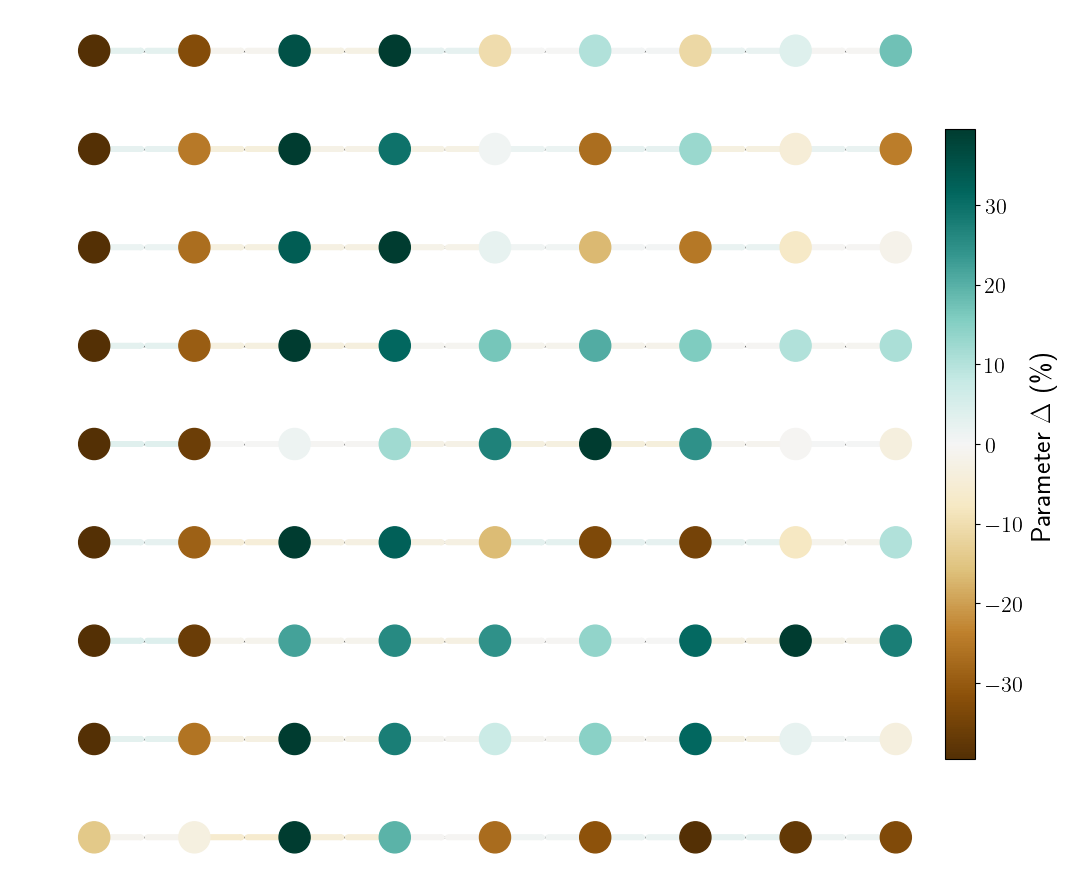

In [5]:

# Use a single color map for both row and column weights
cmap = cm.get_cmap('BrBG')

# Flatten the lists for consistent color scaling
all_values = np.concatenate(capacitance_vectors + inductance_vectors + ws_vectors + wt_vectors)
weight_min = min(all_values)
weight_max = max(all_values)
weight_max = max(weight_max, -weight_min)
weight_min = -weight_max

# Normalize weights for consistent coloring across all coupling strengths
norm = plt.Normalize(vmin=weight_min, vmax=weight_max)

# Function to draw half-colored edges with custom edge colors from the ws and wt vectors
def draw_half_edges_colored(ax, pos, edges, ws_colors, wt_colors, edge_width=4):
    """
    Draw edges where the left half is colored with ws values and the right half with wt values.
    """
    # Iterate over ws and wt edges and color them accordingly
    for edge, ws_color, wt_color in zip(edges, ws_colors, wt_colors):
        line = [pos[edge[0]], pos[edge[1]]]

        # Middle point between the two nodes
        mid_x = (line[0][0] + line[1][0]) / 2
        mid_y = (line[0][1] + line[1][1]) / 2

        # Draw left half (ws)
        left_ws_line = [line[0], (mid_x, mid_y)]
        ax.add_patch(mpatches.FancyArrowPatch(left_ws_line[0], left_ws_line[1],
                                              color=cmap(norm(ws_color)), linewidth=edge_width,
                                              connectionstyle="arc3"))

        # Draw right half (wt)
        right_wt_line = [(mid_x, mid_y), line[1]]
        ax.add_patch(mpatches.FancyArrowPatch(right_wt_line[0], right_wt_line[1],
                                              color=cmap(norm(wt_color)), linewidth=edge_width,
                                              connectionstyle="arc3"))

# Create a new figure
fig, ax = plt.subplots(len(capacitance_vectors), 1, figsize=(10, 1 * len(capacitance_vectors)))

# Store the positions and edges for later edge drawing
all_positions = []
all_edges = []
all_ws_colors = []
all_wt_colors = []

# First, draw all nodes and save their positions
for idx, (capacitance_vector, inductance_vector, ws_vector, wt_vector) in enumerate(zip(capacitance_vectors, inductance_vectors, ws_vectors, wt_vectors)):
    G = nx.Graph()

    # Add nodes for capacitors and inductors
    for i, (c, l) in enumerate(zip(capacitance_vector, inductance_vector)):
        G.add_node(f'C{idx}-{i}', value=c)  # Capacitor node
        G.add_node(f'L{idx}-{i}', value=l)  # Inductor node

    # Add the final capacitor node (since capacitors are one more than inductors)
    G.add_node(f'C{idx}-{len(capacitance_vector) - 1}', value=capacitance_vector[-1])

    # Add dummy edges between capacitors and inductors
    for i in range(len(inductance_vector)):
        G.add_edge(f'C{idx}-{i}', f'L{idx}-{i}', ws=ws_vector[2*i], wt=wt_vector[2*i])
        G.add_edge(f'L{idx}-{i}', f'C{idx}-{i + 1}', ws=ws_vector[2*i + 1], wt=wt_vector[2*i + 1])

    # Prepare linear positions for nodes
    pos_linear = {f'C{idx}-{i}': (2 * i, -idx) for i in range(len(capacitance_vector))}
    pos_linear.update({f'L{idx}-{i}': (2 * i + 1, -idx) for i in range(len(inductance_vector))})

    # Extract node values for coloring
    node_colors = [norm(G.nodes[n]['value']) for n in G.nodes]

    # Draw the graph nodes with capacitance and inductance values
    nx.draw(G, pos_linear, with_labels=False, node_size=500, node_color=node_colors, cmap=cmap, ax=ax[idx])

    # Save positions, edges, and edge colors for later use
    all_positions.append(pos_linear)
    all_edges.append(list(G.edges()))
    all_ws_colors.append(ws_vector)
    all_wt_colors.append(wt_vector)

# Now draw the edges on top of the nodes for each subplot
for idx, (positions, edges, ws_colors, wt_colors) in enumerate(zip(all_positions, all_edges, all_ws_colors, all_wt_colors)):
    draw_half_edges_colored(ax[idx], positions, edges, ws_colors, wt_colors)

# Add a shared colorbar for the nodes on the far right
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(r"Parameter $\Delta$ (\%)", fontsize=20)

plt.tight_layout()
plt.savefig('tln_param_diff.pdf', dpi=300, bbox_inches='tight')
plt.show()